# File Overview

This file performs basic analysis of the shape of the survey results.
This file, combined with [./2_value_counts.ipynb](./2_value_counts.ipynb) satisfy the Data Understanding phase of the CRISP-DM process model

# Outputs / Assets

* none. I use this file as a reference while working in other notebooks

In [3]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

df = pd.read_csv('./assets/survey_results_public.csv')
schema = pd.read_csv('./assets/survey_results_schema.csv')

In [2]:
pd.options.display.max_rows = 2000
pd.options.display.max_colwidth = 1000
pd.options.display.float_format = '{:20,.2f}'.format

How many survey responses, how many questions in the survey, and what are the questions ?

In [3]:
df.shape

(64461, 61)

In [2]:
schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


Look at the first 5 results to get a feel for the data

In [5]:
df.head(5)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.00,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.00,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat less welcome now than last year,40.00,7,4
4,5,"I used to be a developer by profession, but no longer am",Yes,31.00,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or software engineering",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


get some basic distribution stats on the numeric columns. We will drop Respondent for this analysis as it adds no value while looking at distributions

In [6]:
df.drop(columns=['Respondent'], inplace=True)

In [7]:
df.describe()

,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,"45,446.00","34,826.00","34,756.00","41,151.00"
mean,30.83,"319,046,434,018,006,671,021,605,347,767,282,955,785,679,550,652,230,175,347,225,902,142,347,821,540,922,544,850,463,655,341,648,200,666,877,982,135,284,496,846,201,340,446,223,683,444,997,052,222,454,737,454,777,271,390,884,948,085,797,506,042,321,794,689,904,151,619,514,355,525,525,441,628,372,999,228,377,861,214,699,520.00","103,756.05",40.78
std,9.59,inf,"226,885.30",17.82
min,1.00,0.00,0.00,1.00
25%,24.00,"20,000.00","24,648.00",40.00
50%,29.00,"63,000.00","54,049.00",40.00
75%,35.00,"125,000.00","95,000.00",44.00
max,279.00,"11,111,111,111,111,100,229,292,661,653,372,447,457,177,105,123,597,113,203,252,909,355,420,075,566,819,461,612,983,276,178,577,126,027,795,103,194,409,522,456,868,407,491,504,796,354,987,907,779,874,259,801,385,307,009,086,913,733,859,928,066,170,801,018,855,113,218,524,356,699,604,610,429,735,554,641,352,194,317,556,048,199,680.00","2,000,000.00",475.00


Lets drop CompTotal and not consider it any more

* CompTotal looks messy !
* Comptotal is a free form entry that could be in any currency and could be for hourly, weekly, monthly, or annual compensation
* ConvertedComp is a normalised version representing Annual USD compensation

In [8]:
df.drop(columns=['CompTotal'], inplace=True)
df.describe()

,Age,ConvertedComp,WorkWeekHrs
count,"45,446.00","34,756.00","41,151.00"
mean,30.83,"103,756.05",40.78
std,9.59,"226,885.30",17.82
min,1.00,0.00,1.00
25%,24.00,"24,648.00",40.00
50%,29.00,"54,049.00",40.00
75%,35.00,"95,000.00",44.00
max,279.00,"2,000,000.00",475.00


why aren't we seeing YearsCode, YearsCodePro, Age1stCode in the numeric result set ? 

Lets look at the dtype and value_counts in those cells

In [9]:
df[['YearsCode', 'YearsCodePro', 'Age1stCode']].dtypes

YearsCode       object
YearsCodePro    object
Age1stCode      object
dtype: object

In [10]:
for column in ['YearsCode', 'YearsCodePro', 'Age1stCode']:
    print('----- %s -----' % column)
    print(df[column].value_counts())
    print('')

----- YearsCode -----
10                    4510
5                     4249
6                     3834
7                     3477
8                     3407
4                     3254
3                     2951
15                    2586
20                    2562
12                    2453
9                     2344
2                     1916
11                    1691
14                    1479
13                    1468
25                    1338
16                    1203
30                    1114
18                    1089
17                    1057
1                      902
22                     792
Less than 1 year       757
19                     657
35                     599
23                     572
21                     550
40                     535
24                     449
26                     378
27                     335
28                     314
32                     309
38                     289
37                     258
36                     246
33    

The YearsCode, YearsCodePro, Age1stCode columns are strings but they contain mostly numbers, with a few inequality strings to represent the boundaries

For all future analysis I will convert them to numeric using these transforms:

* 'More than 50 years' -> 51
* 'Younger than 5 years' -> 4
* 'Older than 85' -> 86
* 'Less than 1 year' -> 0

While this is losing info in that someone over 50 is being converted to 51, this is an acceptable cost weighed against the benefit of treating these values as numeric vs categorical

* categorical will add X columns to the dataset
* if treated as categorical, the models lose the relative proximity of values. In other words 2 is close to 3 but '2' and '3' are unrelated (from a computing perspective)


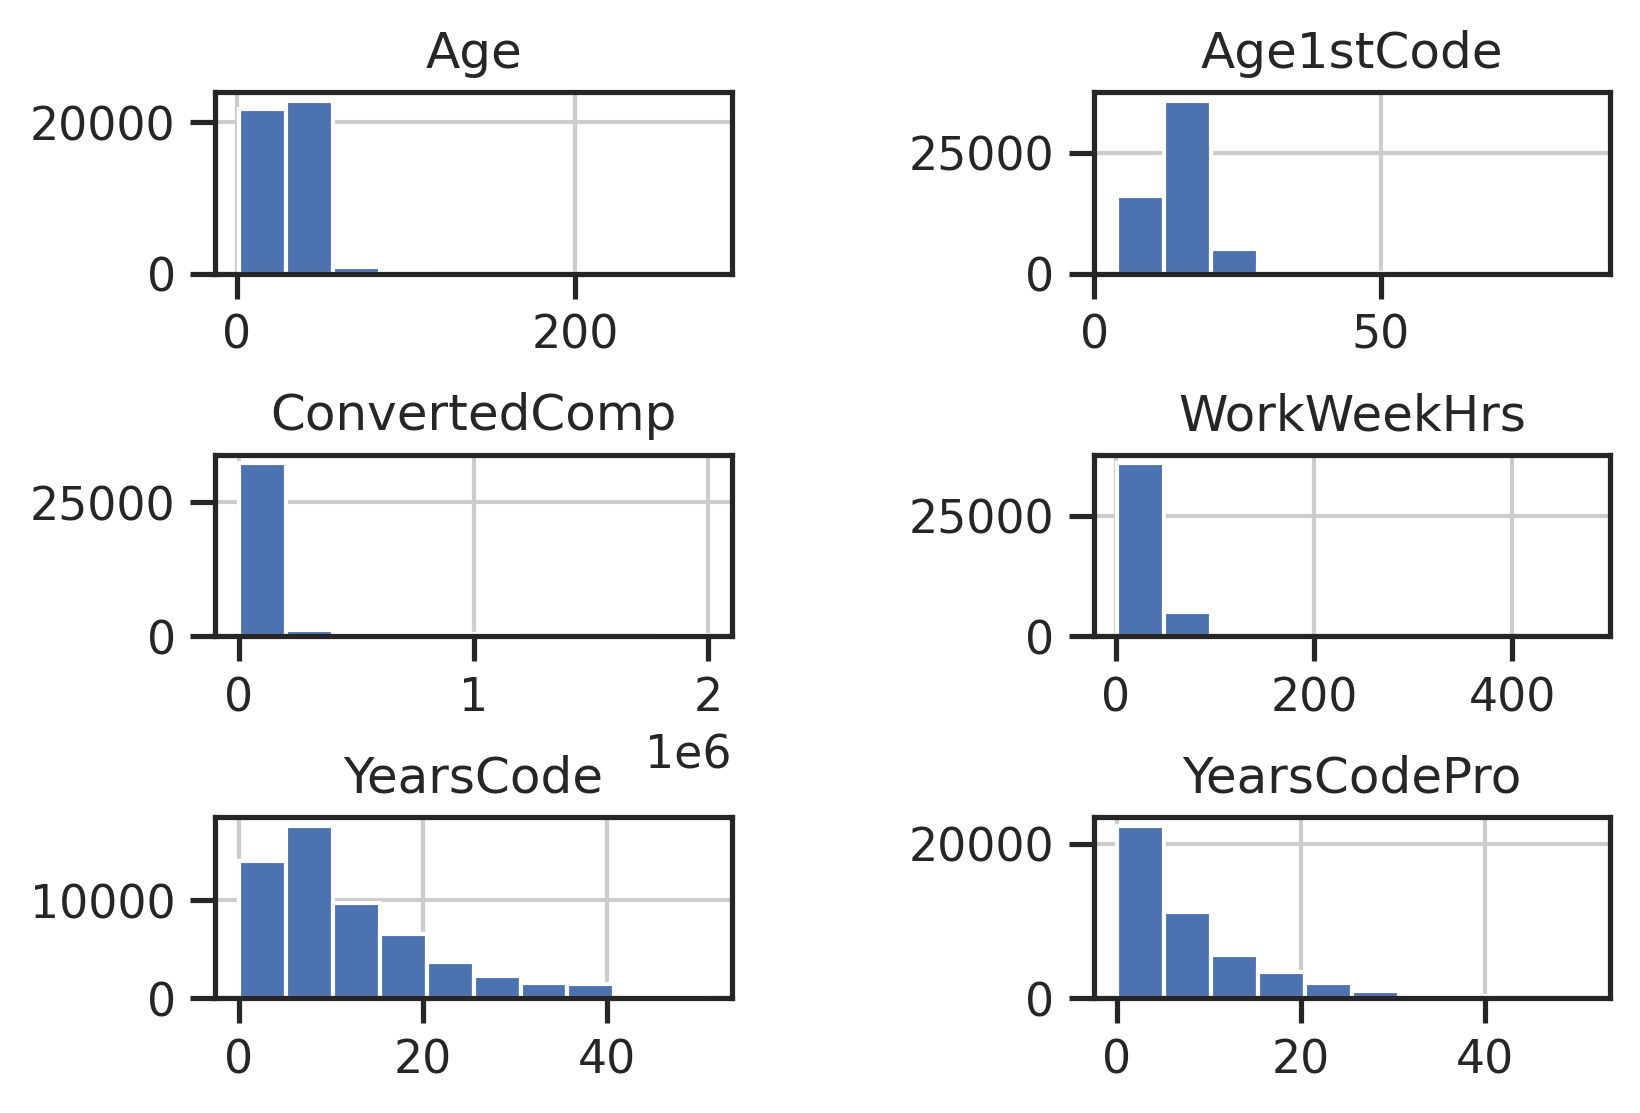

In [19]:
from country_classifier.convert_age_series_to_numeric import convert_age_series_to_numeric
df['YearsCode'] = df['YearsCode'].map(convert_age_series_to_numeric)
df['YearsCodePro'] = df['YearsCodePro'].map(convert_age_series_to_numeric)
df['Age1stCode'] = df['Age1stCode'].map(convert_age_series_to_numeric)


df.drop(columns=['Respondent', 'CompTotal']).hist()
plt.subplots_adjust(hspace=1)
plt.subplots_adjust(wspace=0.7)

lets zoom in a bit on those distributions

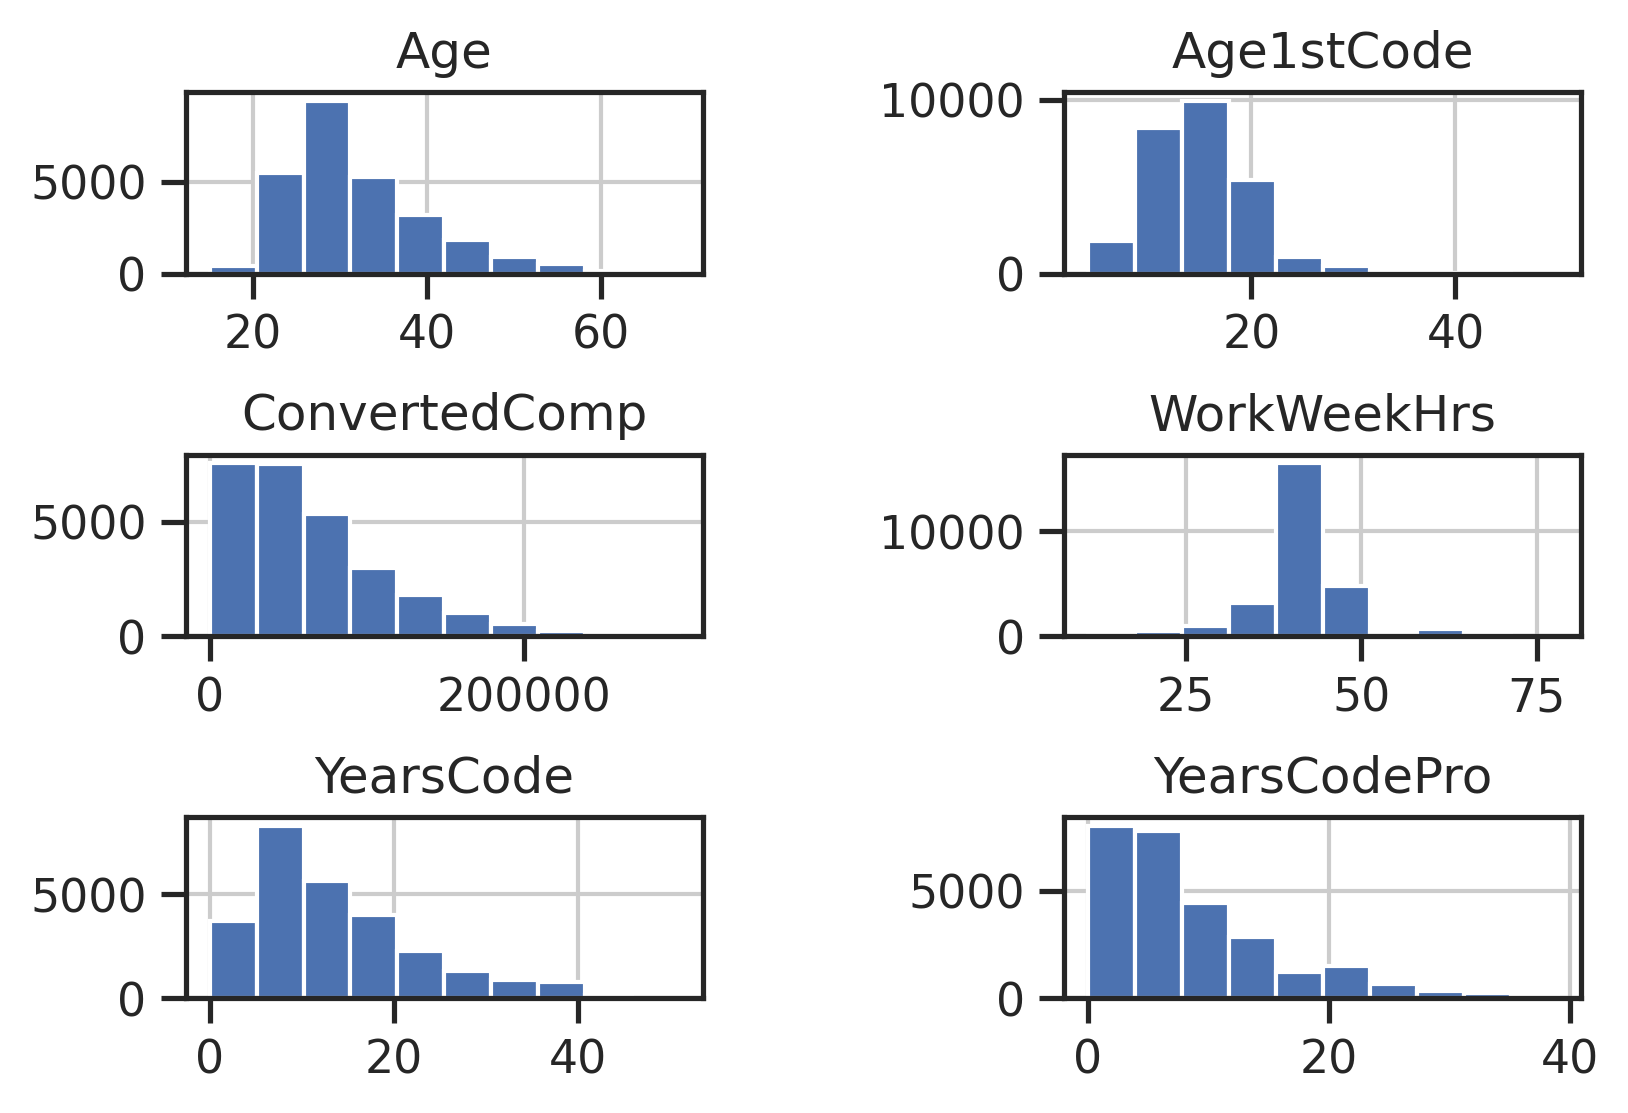

In [25]:
df.drop(columns=['Respondent', 'CompTotal']) \
  .query('Age > 10 and Age < 70 and ConvertedComp < 300000 and WorkWeekHrs > 10 and WorkWeekHrs < 80 and Age1stCode < 100 and YearsCodePro < 40') \
  .hist()
plt.subplots_adjust(hspace=1)
plt.subplots_adjust(wspace=0.7)

are there any correlation between the numerics ?

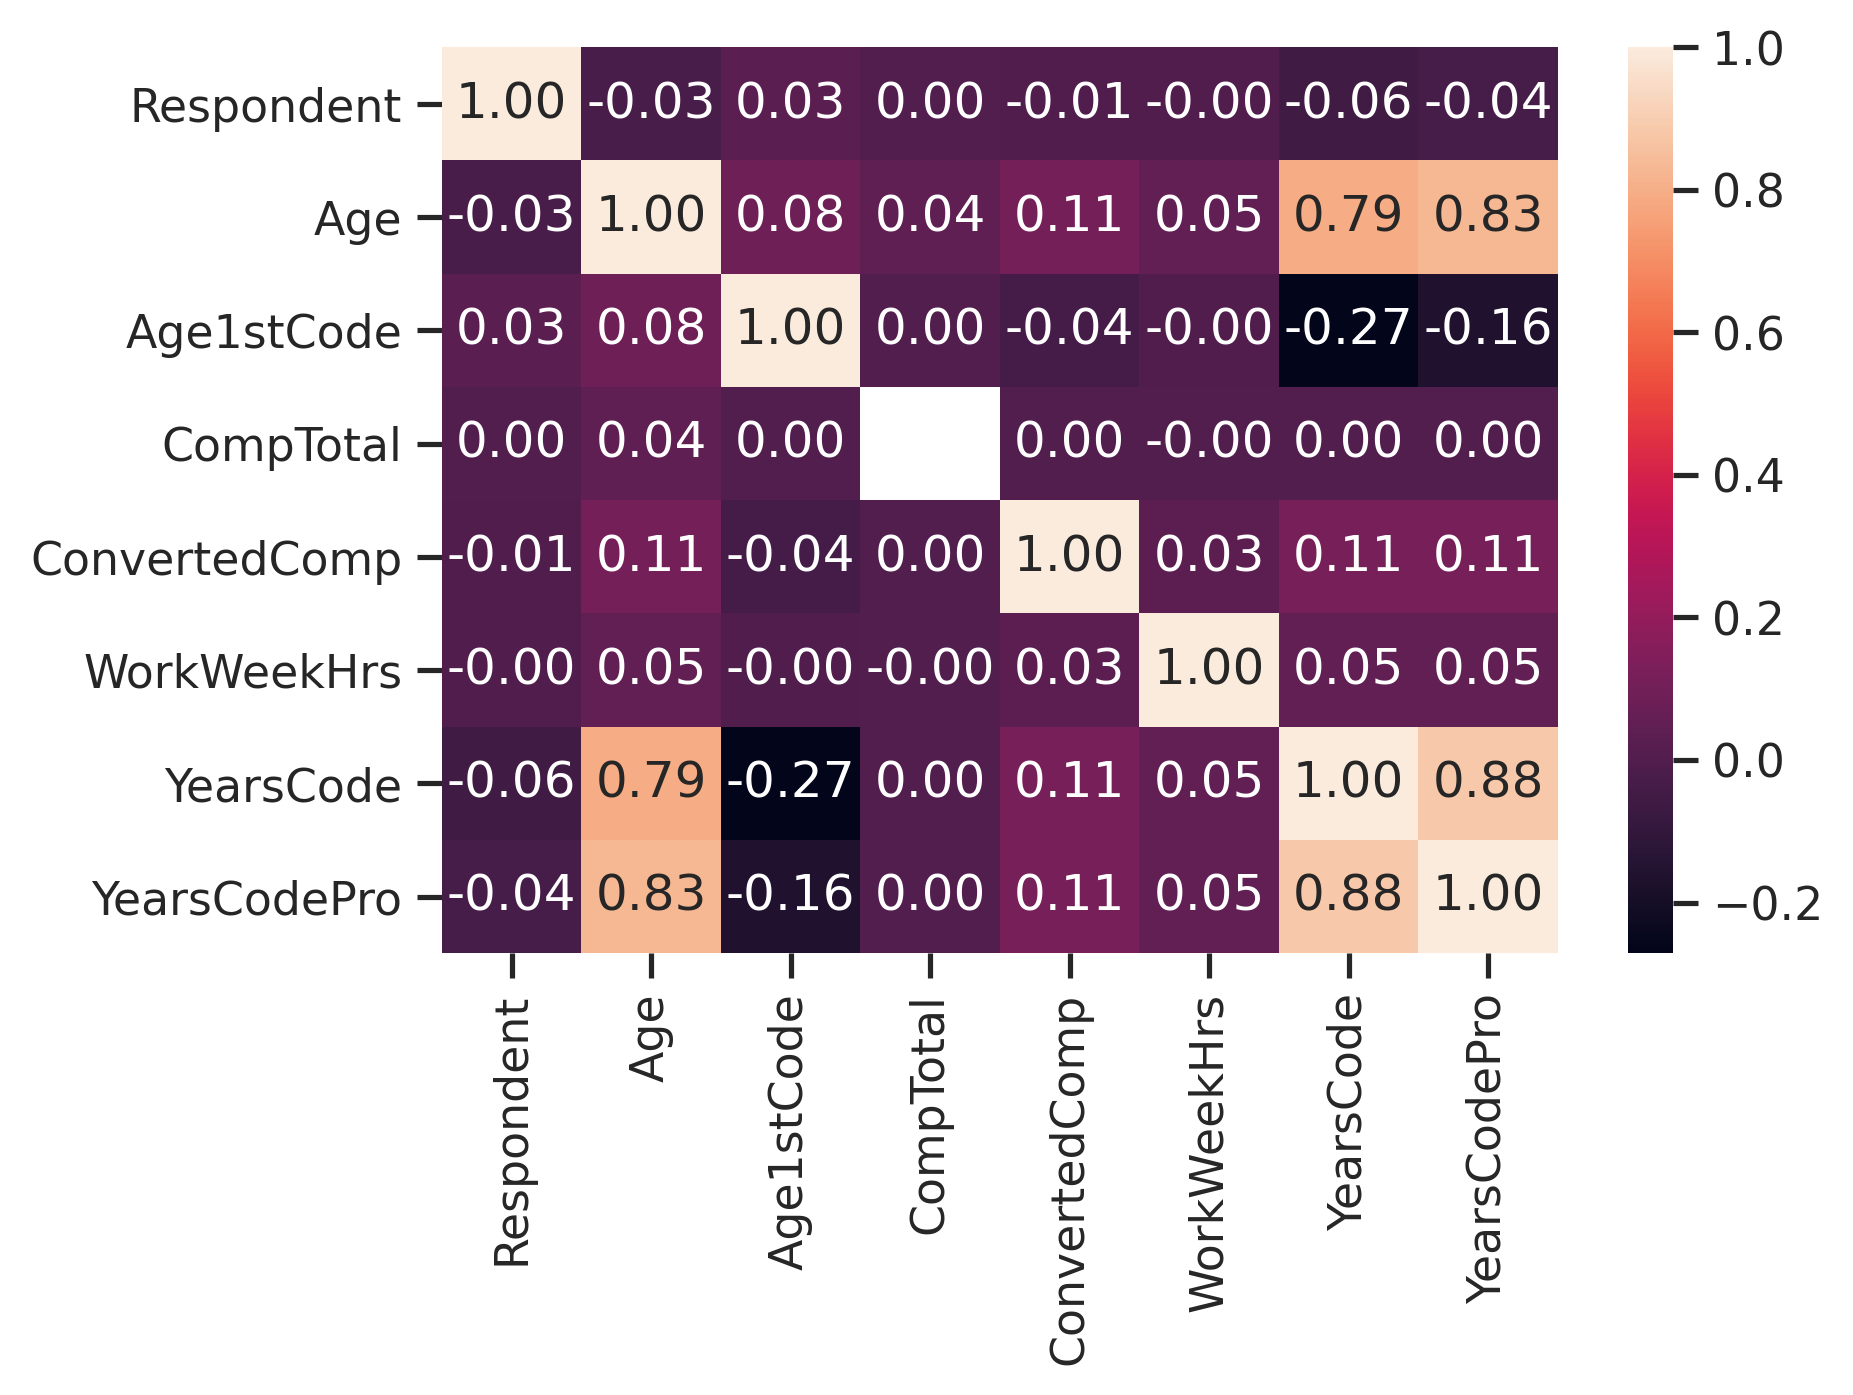

In [6]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

How often was each question left unanswered ?

In [14]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
(numeric_columns.isna().sum() / numeric_columns.shape[0]).sort_values(ascending=False)

ConvertedComp                   0.46
WorkWeekHrs                     0.36
Age                             0.29
YearsCodePro                    0.28
YearsCode                       0.11
Age1stCode                      0.10
dtype: float64

In [15]:
categorical_columns = df.select_dtypes(include=['object'])
(categorical_columns.isna().sum() / categorical_columns.shape[0]).sort_values(ascending=False)

NEWPurchaseResearch                            0.42
PurchaseWhat                                   0.39
WebframeDesireNextYear                         0.38
CompFreq                                       0.38
MiscTechWorkedWith                             0.37
NEWJobHuntResearch                             0.36
NEWDevOpsImpt                                  0.35
WebframeWorkedWith                             0.34
NEWJobHunt                                     0.34
MiscTechDesireNextYear                         0.34
NEWOnboardGood                                 0.34
NEWDevOps                                      0.34
NEWOvertime                                    0.33
Sexuality                                      0.32
DatabaseDesireNextYear                         0.32
OrgSize                                        0.31
JobSat                                         0.30
CurrencySymbol                                 0.29
CurrencyDesc                                   0.29
Ethnicity   